In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/N1000_hydraulic/'
data_dir = ''

mu = (np.sin(np.pi/3.))**2 / (2*np.pi/3. - np.sin(2*np.pi/3.))

In [2]:
L_dict = {}
for i in range(1, 5) :
    path = os.path.join(main_dir, data_dir, 'run'+str(i).zfill(4))

    conf, ch = chain.load_config(os.path.join(path, 'config.conf'))

    if ch.lumen_type == 'hydroosmotic' :
        L, nions, pos = tools.load_file(os.path.join(path, 'sim_all.dat'))
    elif ch.lumen_type == 'hydraulic' :
        L, pos = tools.load_file(os.path.join(path, 'sim_all.dat'), hydroosmotic = False)
    
    #ell = tools.load_brfile(os.path.join(path, 'sim_bridges.dat'))
    L_dict[i] = L
    print(i, end='\r')

show_chain = 0
if show_chain :
    print(ch)
    x = np.linspace(0, ch.total_length, 1001)
    tools.plot_profile(x, ch, centers=0, lw=1.5, show=True)
    

KeyboardInterrupt: 

In [78]:
#savename_ns = os.path.join(main_dir, '_data/osmotic_competition/osmotic_eq/no_screening/graphs.eps')
x_log=1
y_log=0
show_totalarea=True

if ch.lumen_type == 'hydroosmotic' :
    tools.plot_evolution(L, nions, ell, savename='', show_totalarea=False, savefig=0, x_logscale=x_log, y_logscale=y_log, figsize=(8, 8))
else :
    tools.plot_evolution_hydraulic(L, ell, savename='', show_totalarea=show_totalarea, savefig=0, x_logscale=x_log, y_logscale=y_log, figsize=(10, 7))




NameError: name 'ell' is not defined

In [69]:
distrib = {}

color_list = ['r', 'b', 'g', 'purple', 'orange']

#step = np.logspace(1, np.log(50000)/np.log(10), 31, dtype=int)
step = [1, 100, 1000, 10000, 40000]

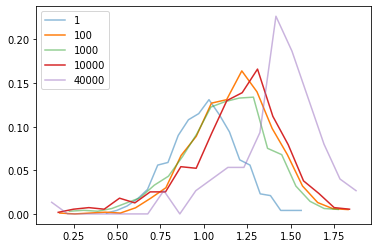

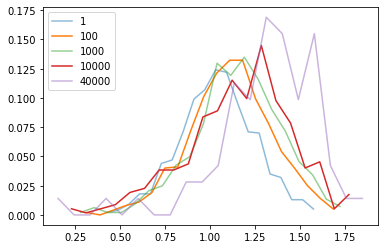

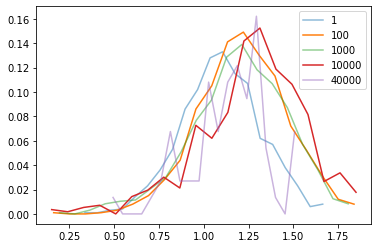

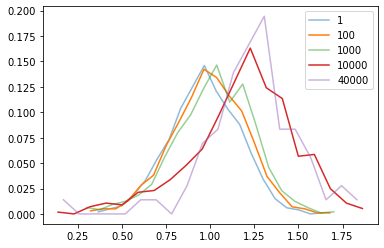

In [74]:
for k in L_dict.keys() :
    n=0
    for s in step :
        n+=1
        array = L_dict[k][s, 1:]
        cleaned_array = array[~np.isnan(array)]
        
        phi, x = np.histogram(cleaned_array, bins=20)
        xbar = np.average(x)
        
        plt.plot(0.5*(x[1:]+x[:-1])/xbar, phi/np.sum(phi), label = s, alpha = 0.5*n)
        distrib[s] = [0.5*(x[1:]+x[:-1])/xbar, phi/np.sum(phi)]
        if s % 1000 == 0 :
            print(t, end='\r')
    plt.legend()
    plt.show()

# From Hydroosmotic to Hydraulic

======= CHAIN =======
Type         : hydraulic
Total length : 14.38355091101359
Current Time : 0
======= PARAMETERS =======
tau : 1.0
======= LUMENS =======
Nb lumens : 2
Lumen 0 is at position 0.00000 with length 0.00000 and pumping 0.00000
Lumen 1 is at position 5.91665 with length 0.91665 and pumping 0.00000
Lumen 2 is at position 8.39480 with length 0.98875 and pumping 0.00000
Lumen -1 is at position 14.38355 with length 0.00000 and pumping 0.00000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 5.00000 with pumping 0.00000
Bridge 1 : (1, 2) has length 0.57276 with pumping 0.00000
Bridge 2 : (2, -1) has length 5.00000 with pumping 0.00000



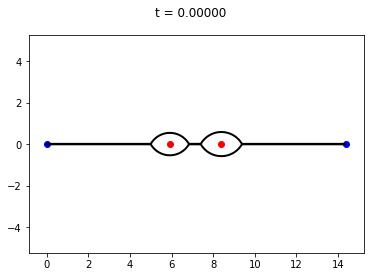

Import successful !


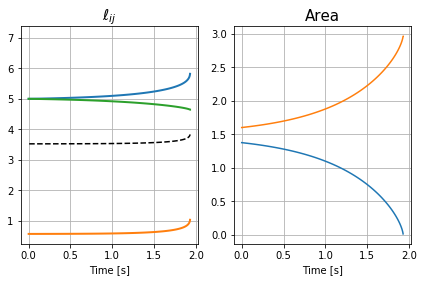

In [83]:
conf, ch = chain.load_config(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/2lumens/out_hydrau/', 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)

tools.plot_profile(x, ch)

plot = 1
if plot :
    ell_hydrau = tools.load_brfile(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/2lumens/out_hydrau/', 'sim_bridges.dat'))

    L_hydrau, pos_hydrau = tools.load_file(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/2lumens/out_hydrau/', 'sim_all.dat'), hydroosmotic=False)
    tools.plot_evolution_hydraulic(L_hydrau, ell_hydrau)




======= CHAIN =======
Type         : hydroosmotic
Total length : 14.38355091101359
Current Time : 0
Screening lengths : 
        xi_s = 0.03524253593622103
        xi_v = 176.21267968110516
Permeation times :
       tau_s = 0.01
       tau_v = 31.0
Pumping : None
======= LUMENS =======
Nb lumens : 2
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00000
Lumen 1 is at position 5.91665 with length 0.91665 and 1.37617 ions with pumping 0.00000
Lumen 2 is at position 8.39480 with length 0.98875 and 1.60117 ions with pumping 0.00000
Lumen -1 is at position 14.38355 with length 0.00000 and 0.00000 ions with pumping 0.00000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 5.00000 with pumping 0.00000
Bridge 1 : (1, 2) has length 0.57276 with pumping 0.00000
Bridge 2 : (2, -1) has length 5.00000 with pumping 0.00000



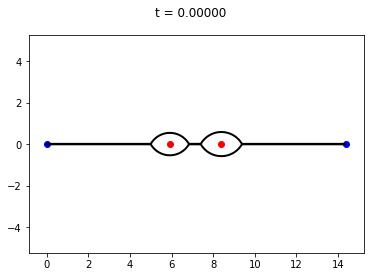

Import successful !


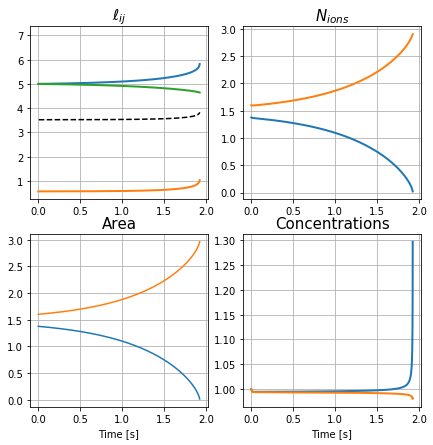

In [94]:
conf, ch = chain.load_config(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/2lumens/out_osm/', 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)

tools.plot_profile(x, ch)

plot = 1
if plot :
    ell_osm = tools.load_brfile(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/2lumens/out_osm/', 'sim_bridges.dat'))
    L_osm, nions_osm, pos_osm = tools.load_file(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/osmotic/2lumens/out_osm/', 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L_osm, nions_osm, ell_osm)





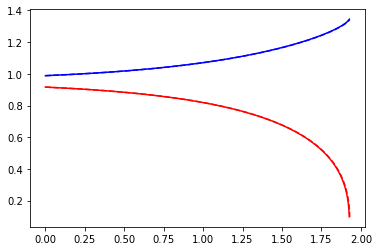

In [95]:
#plt.xscale('log')

plt.plot(L_hydrau[:,0], L_hydrau[:, 1], label = 'hydrau, 1', color = 'r', linestyle = '--')
plt.plot(L_hydrau[:,0], L_hydrau[:, 2], label = 'hydrau, 2', color = 'b', linestyle = '--')

plt.plot(L_osm[:,0], L_osm[:, 1], label = 'osm, 1', color = 'r')
plt.plot(L_osm[:,0], L_osm[:, 2], label = 'osm, 2', color = 'b')

In [134]:
def sol_c(x, ca, c1, c2, X) :
    return ca - (c1-ca)*np.sinh((x-0.5)/X)/np.sinh(1./X) + (c2-ca)*np.sinh((x+0.5)/X)/np.sinh(1./X)


(-0.55, 0.55, 0.475, 1.025)

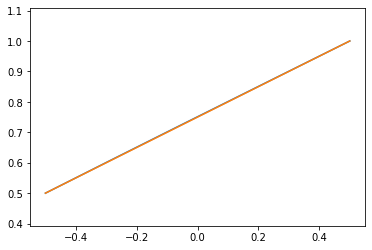

In [135]:
x = np.linspace(-0.5, 0.5, 1001)
ca = 1.
c1, c2 = .5, 1.

X = 5.


plt.plot(x, sol_c(x, ca, c1, c2, X))
plt.plot(x, c2*(1/2.+x) + c1*(1/2.-x))
plt.axis('equal')

In [137]:
def lam(x, chiv, chis, dC_L, dC_R, ca_LR) :
    la = 0.5*ca_LR * (np.exp(-x/chiv) - np.exp(-0.5/chiv))
    l_L = (dC_L-ca_LR) * I_1_minus_v2(x, chiv, chis) / (2.*chiv*np.sinh(1./chis))
    l_R = (dC_R-ca_LR) * I_2_minus_v2(x, chiv, chis) / (2.*chiv*np.sinh(1./chis))
    return la + l_L - l_R

def mu(x, chiv, chis, dC_L, dC_R, ca_LR) :
    ma = 0.5*ca_LR * (np.exp(x/chiv) - np.exp(-0.5/chiv))
    m_L = (dC_L-ca_LR) * I_1_plus_v2(x, chiv, chis) / (2.*chiv*np.sinh(1./chis))
    m_R = (dC_R-ca_LR) * I_2_plus_v2(x, chiv, chis) / (2.*chiv*np.sinh(1./chis))
    return ma - m_L + m_R
    
def I_1_minus_v2(x, Xv, Xs) :
    c1, s1 = np.cosh(1./Xs), np.sinh(1./Xs)
    cmx, smx = np.cosh((x-0.5)/Xs), np.sinh((x-0.5)/Xs)
    
    if Xv == Xs :
        return 0.5*( (x-0.5)*np.exp(-0.5/Xv) + 0.5*Xv*(np.exp(-2.*x/Xv) - np.exp(-1./Xv))*np.exp(0.5/Xv) )
    
    return Xv*Xs*(np.exp(-x/Xv)*(Xv*cmx + Xs*smx) - Xv*np.exp(-0.5/Xv))/ ( (Xv-Xs)*(Xv+Xs) )

def I_2_minus_v2(x, Xv, Xs) :
    c1, s1 = np.cosh(1./Xs), np.sinh(1./Xs)
    cpx, spx = np.cosh((x+0.5)/Xs), np.sinh((x+0.5)/Xs)
    
    if Xv == Xs :
        return 0.5*( (x-0.5)*np.exp(0.5/Xv) + 0.5*Xv*(np.exp(-2.*x/Xv) - np.exp(-1./Xv))*np.exp(-0.5/Xv) )
    
    return Xv*Xs*(np.exp(-x/Xv)*(Xv*cpx + Xs*spx) - np.exp(-0.5/Xv)*(Xv*c1 + Xs*s1))/ ( (Xv-Xs)*(Xv+Xs) )

def I_1_plus_v2(x, Xv, Xs) :
    c1, s1 = np.cosh(1./Xs), np.sinh(1./Xs)
    cmx, smx = np.cosh((x-0.5)/Xs), np.sinh((x-0.5)/Xs)
    
    if Xv == Xs :
        return 0.5*( 0.5*Xv*(np.exp(2.*x/Xv) - np.exp(-1./Xv))*np.exp(-0.5/Xv) - (x+0.5)*np.exp(0.5/Xv))
    
    return Xv*Xs*(np.exp(x/Xv)*(Xv*cmx - Xs*smx) - np.exp(-0.5/Xv)*(Xv*c1 + Xs*s1))/ ( (Xv-Xs)*(Xv+Xs) )

def I_2_plus_v2(x, Xv, Xs) :
    c1, s1 = np.cosh(1./Xs), np.sinh(1./Xs)
    cpx, spx = np.cosh((x+0.5)/Xs), np.sinh((x+0.5)/Xs)
    
    if Xv == Xs :
        return 0.5*( 0.5*Xv*(np.exp(2.*x/Xv) - np.exp(-1./Xv))*np.exp(0.5/Xv) - (x+0.5)*np.exp(-0.5/Xv))
    
    return Xv*Xs*(np.exp(x/Xv)*(Xv*cpx - Xs*spx) - np.exp(-0.5/Xv)*Xv)/ ( (Xv-Xs)*(Xv+Xs) )


def sol_p(x, p1, p2, ca, c1, c2, Xs, Xv) :
    P1 = p1*np.sinh((x-0.5)/Xv)/np.sinh(1./Xv) 
    P2 = p2*np.sinh((x+0.5)/Xv)/np.sinh(1./Xv) 
    L = lam(x, Xv, Xs, c1, c2, 0.5*(c1+c2))*np.exp(x/Xv)
    M = mu(x, Xv, Xs, c1, c2, 0.5*(c1+c2))*np.exp(-x/Xv)
    F = np.exp(-.5/Xv) / np.sinh(1./Xv) * ( lam(-0.5, Xv, Xs, c1, c2, 0.5*(c1+c2))*np.sinh((x-0.5)/Xv) - mu(0.5, Xv, Xs, c1, c2, 0.5*(c1+c2))*np.sinh((x+0.5)/Xv))
    return P1 - P2 + L + M + F


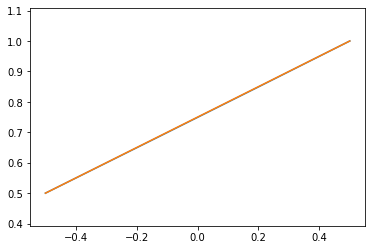

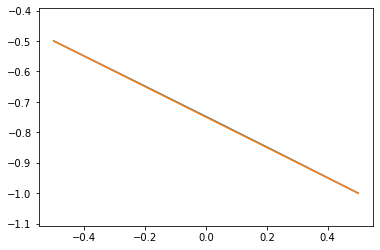

In [157]:
x = np.linspace(-0.5, 0.5, 1001)
ca = 0.
c1, c2 = .5, 1.
p1, p2 = .5, 1.

Xs = 10.
Xv = 10.


plt.plot(x, sol_c(x, ca, c1, c2, Xs))
plt.plot(x, c2*(1/2.+x) + c1*(1/2.-x))
plt.axis('equal')
plt.show()

plt.plot(x, sol_p(x, p1, p2, ca, c1, c2, Xs, Xv))
plt.plot(x, -(p2*(1/2.+x) + p1*(1/2.-x)))
plt.axis('equal')
plt.show()


In [4]:
from scipy.integrate import odeint

In [83]:
def calc_new_timestep(h, error, tolerance, secure=0.9, cst_tstep=0) :

    if cst_tstep :
        return h
    else :
        if error == 0. :
            #print('Error !', error)
            return 1.
        else :
            if error > tolerance :
                s = secure*(tolerance / error)**(0.2)
                #ratio = (tolerance / (2.*error))**0.5
                #s = secure*min(2., max(0.3, ratio))
            else :
                s = secure*(tolerance / error)**(0.25)
                #ratio = (tolerance / (2.*error))**0.5
                #s = secure*min(2., max(0.3, ratio))
        #print(s)
        return h*s
    
    
def rkf45(func, t0, y0, h, tol) :
    if 1 :
    #try :
        k1 = h*func(t0, y0)
        k2 = h*func(t0 + 0.25*h, y0 + 0.25*k1)
        k3 = h*func(t0 + (3./8.)*h, y0 + (3./32.)*k1 + (9./32.)*k2)
        k4 = h*func(t0 + (12./13.)*h, y0 + (1932./2197.)*k1 - (7200./2197.)*k2 + (7296./2197.)*k3)
        k5 = h*func(t0 + h, y0 + (439./216.)*k1 - 8.*k2 + (3680./513.)*k3 - (845./4104.)*k4)
        k6 = h*func(t0 + 0.5*h, y0 - (8./27.)*k1 + 2*k2 - (3544./2565)*k3 + (1859./4104.)*k4 - (11./40.)*k5)
        
        new_y = y0 + (25./216.)*k1 + (1408./2565.)*k3 + (2197./4104.)*k4 - (1./5.)*k5
        new_z = y0 + (16./135.)*k1 + (6656./12825.)*k3 + (28561./56430.)*k4 - (9./50.)*k5 + (2./55.)*k6
        
        s = calc_new_timestep(h, error = abs(new_z - new_y), tolerance=tol)
        
        return t0+h, new_y, s
    else :
    #except :
        return None

def integrate(func, y0, tspan, y_bounds=None, timestep=1e-1, method = 'rk45', tol = 1e-2, t0=0) :
    nsteps = int((tspan[1] - tspan[0])/timestep)
    
    if method == 'euler' :
        sol = [y0]
        time = [t0]
        for n in range(1, nsteps+1) :
            try :
                if y_bounds == None :
                    t, s = euler(func, time[n-1], sol[n-1], timestep)
                    time += [t]
                    sol += [s]
                else :
                    if sol[n-1] >= min(y_bounds) and sol[n-1] <= max(y_bounds) :
                        t, s = euler(func, time[n-1], sol[n-1], timestep)
                        time += [t]
                        sol += [s]
                    else :
                        print('Stop integration, bounds reached.')
                        break ;
            except :
                break ;
    if method == 'rk45' :
        sol = [y0]
        time = [t0]
        for n in range(1, nsteps+1) :
            try :
                if y_bounds == None :
                    t, s = rk45(func, time[n-1], sol[n-1], timestep)
                    time += [t]
                    sol += [s]
                else :
                    if sol[n-1] >= min(y_bounds) and sol[n-1] <= max(y_bounds) :
                        t, s = euler(func, time[n-1], sol[n-1], timestep)
                        time += [t]
                        sol += [s]
                    else :
                        print('Stop integration, bounds reached.')
                        break ;
            except :
                break ;
    elif method == 'rkf45' :
        t, s = tspan[0], y0
        sol = [y0]
        time = [t]
        n = 1
        while t < tspan[1] :
            if sol[n-1] == None :
                break ;
            if 1:
            #try :
                print(rkf45(func, time[n-1], sol[n-1], timestep, tol))
                t, s, o = rkf45(func, time[n-1], sol[n-1], timestep, tol)
                time += [t]
                sol += [s]
                timestep *= o
                n += 1
            else :
            #except :
                break ;
    return time, sol


In [89]:
def func(t, y) :
    C = 27./10.
    if t == 0. :
        return 0.
    return y*(5*C - 8*t**1.5) / (4*t**2.5 + 10.*C*t*(1 - t**0.5))

def func(t, y) :
    return -t*y**2

In [91]:
h = 0.01
y0 = 4.
tspan = [0., 1.]

t3, sol3 = integrate(func, y0, tspan, timestep=h, t0=0., tol = 1e-6, method='rkf45')

(0.01, 3.999200159967432, 0.6495392971888257)
(0.01649539297188826, 3.997824400037917, 0.2935820979962582)
(0.01840232406788536, 3.9972926694015647, 0.3143782238742064)
(0.019001821678895425, 3.9971135306131527, 1.0)
(0.019601319289905487, 3.996928666341068, 0.11753370076679494)
(0.019671780462728352, 3.9969065626172324, 0.011616286718825159)
(0.019672598959914408, 3.9969063053894596, 0.00016046936898076844)
(0.019672599091258135, 3.9969063053481815, 1.0)
(0.019672599222601863, 3.9969063053069034, 1.0)
(0.01967259935394559, 3.9969063052656253, 1.0)
(0.019672599485289318, 3.996906305224347, 1.0)
(0.019672599616633046, 3.996906305183069, 1.0)
(0.019672599747976773, 3.996906305141791, 1.0)
(0.0196725998793205, 3.996906305100513, 1.0)
(0.01967260001066423, 3.996906305059235, 1.0)
(0.019672600142007956, 3.9969063050179567, 1.0)
(0.019672600273351683, 3.9969063049766786, 1.0)
(0.01967260040469541, 3.9969063049354006, 1.0)
(0.01967260053603914, 3.9969063048941225, 1.0)
(0.019672600667382866, 

(0.019672803068067037, 3.9969062412433045, 1.0)
(0.019672803199410765, 3.9969062412020264, 1.0)
(0.019672803330754492, 3.9969062411607483, 1.0)
(0.01967280346209822, 3.9969062411194702, 1.0)
(0.019672803593441947, 3.996906241078192, 1.0)
(0.019672803724785675, 3.996906241036914, 1.0)
(0.019672803856129403, 3.996906240995636, 1.0)
(0.01967280398747313, 3.996906240954358, 1.0)
(0.019672804118816858, 3.9969062409130793, 2.575041838108601e-08)
(0.01967280411881686, 3.9969062409130793, 1.0)
(0.019672804118816865, 3.9969062409130793, 1.0)
(0.019672804118816868, 3.9969062409130793, 1.0)
(0.01967280411881687, 3.9969062409130793, 1.0)
(0.019672804118816875, 3.9969062409130793, 1.0)
(0.01967280411881688, 3.9969062409130793, 1.0)
(0.019672804118816882, 3.9969062409130793, 1.0)
(0.019672804118816885, 3.9969062409130793, 1.0)
(0.01967280411881689, 3.9969062409130793, 1.0)
(0.019672804118816892, 3.9969062409130793, 1.0)
(0.019672804118816896, 3.9969062409130793, 1.0)
(0.0196728041188169, 3.996906240

(0.019672804118822544, 3.9969062409130793, 1.0)
(0.019672804118822548, 3.9969062409130793, 1.0)
(0.01967280411882255, 3.9969062409130793, 1.0)
(0.019672804118822555, 3.9969062409130793, 1.0)
(0.019672804118822558, 3.9969062409130793, 1.0)
(0.01967280411882256, 3.9969062409130793, 1.0)
(0.019672804118822565, 3.9969062409130793, 1.0)
(0.01967280411882257, 3.9969062409130793, 1.0)
(0.019672804118822572, 3.9969062409130793, 1.0)
(0.019672804118822575, 3.9969062409130793, 1.0)
(0.01967280411882258, 3.9969062409130793, 1.0)
(0.019672804118822582, 3.9969062409130793, 1.0)
(0.019672804118822586, 3.9969062409130793, 1.0)
(0.01967280411882259, 3.9969062409130793, 1.0)
(0.019672804118822593, 3.9969062409130793, 1.0)
(0.019672804118822596, 3.9969062409130793, 1.0)
(0.0196728041188226, 3.9969062409130793, 1.0)
(0.019672804118822603, 3.9969062409130793, 1.0)
(0.019672804118822607, 3.9969062409130793, 1.0)
(0.01967280411882261, 3.9969062409130793, 1.0)
(0.019672804118822614, 3.9969062409130793, 1.0)


(0.019672804118828383, 3.9969062409130793, 1.0)
(0.019672804118828387, 3.9969062409130793, 1.0)
(0.01967280411882839, 3.9969062409130793, 1.0)
(0.019672804118828394, 3.9969062409130793, 1.0)
(0.019672804118828397, 3.9969062409130793, 1.0)
(0.0196728041188284, 3.9969062409130793, 1.0)
(0.019672804118828404, 3.9969062409130793, 1.0)
(0.019672804118828408, 3.9969062409130793, 1.0)
(0.01967280411882841, 3.9969062409130793, 1.0)
(0.019672804118828414, 3.9969062409130793, 1.0)
(0.019672804118828418, 3.9969062409130793, 1.0)
(0.01967280411882842, 3.9969062409130793, 1.0)
(0.019672804118828425, 3.9969062409130793, 1.0)
(0.01967280411882843, 3.9969062409130793, 1.0)
(0.019672804118828432, 3.9969062409130793, 1.0)
(0.019672804118828435, 3.9969062409130793, 1.0)
(0.01967280411882844, 3.9969062409130793, 1.0)
(0.019672804118828442, 3.9969062409130793, 1.0)
(0.019672804118828446, 3.9969062409130793, 1.0)
(0.01967280411882845, 3.9969062409130793, 1.0)
(0.019672804118828453, 3.9969062409130793, 1.0)


(0.019672804118834625, 3.9969062409130793, 1.0)
(0.019672804118834628, 3.9969062409130793, 1.0)
(0.01967280411883463, 3.9969062409130793, 1.0)
(0.019672804118834635, 3.9969062409130793, 1.0)
(0.01967280411883464, 3.9969062409130793, 1.0)
(0.019672804118834642, 3.9969062409130793, 1.0)
(0.019672804118834646, 3.9969062409130793, 1.0)
(0.01967280411883465, 3.9969062409130793, 1.0)
(0.019672804118834653, 3.9969062409130793, 1.0)
(0.019672804118834656, 3.9969062409130793, 1.0)
(0.01967280411883466, 3.9969062409130793, 1.0)
(0.019672804118834663, 3.9969062409130793, 1.0)
(0.019672804118834666, 3.9969062409130793, 1.0)
(0.01967280411883467, 3.9969062409130793, 1.0)
(0.019672804118834673, 3.9969062409130793, 1.0)
(0.019672804118834677, 3.9969062409130793, 1.0)
(0.01967280411883468, 3.9969062409130793, 1.0)
(0.019672804118834684, 3.9969062409130793, 1.0)
(0.019672804118834687, 3.9969062409130793, 1.0)
(0.01967280411883469, 3.9969062409130793, 1.0)
(0.019672804118834694, 3.9969062409130793, 1.0)

(0.019672804118840634, 3.9969062409130793, 1.0)
(0.019672804118840637, 3.9969062409130793, 1.0)
(0.01967280411884064, 3.9969062409130793, 1.0)
(0.019672804118840644, 3.9969062409130793, 1.0)
(0.019672804118840648, 3.9969062409130793, 1.0)
(0.01967280411884065, 3.9969062409130793, 1.0)
(0.019672804118840655, 3.9969062409130793, 1.0)
(0.019672804118840658, 3.9969062409130793, 1.0)
(0.01967280411884066, 3.9969062409130793, 1.0)
(0.019672804118840665, 3.9969062409130793, 1.0)
(0.01967280411884067, 3.9969062409130793, 1.0)
(0.019672804118840672, 3.9969062409130793, 1.0)
(0.019672804118840675, 3.9969062409130793, 1.0)
(0.01967280411884068, 3.9969062409130793, 1.0)
(0.019672804118840682, 3.9969062409130793, 1.0)
(0.019672804118840686, 3.9969062409130793, 1.0)
(0.01967280411884069, 3.9969062409130793, 1.0)
(0.019672804118840693, 3.9969062409130793, 1.0)
(0.019672804118840696, 3.9969062409130793, 1.0)
(0.0196728041188407, 3.9969062409130793, 1.0)
(0.019672804118840703, 3.9969062409130793, 1.0)


(0.019672804118846494, 3.9969062409130793, 1.0)
(0.019672804118846497, 3.9969062409130793, 1.0)
(0.0196728041188465, 3.9969062409130793, 1.0)
(0.019672804118846504, 3.9969062409130793, 1.0)
(0.019672804118846508, 3.9969062409130793, 1.0)
(0.01967280411884651, 3.9969062409130793, 1.0)
(0.019672804118846515, 3.9969062409130793, 1.0)
(0.019672804118846518, 3.9969062409130793, 1.0)
(0.01967280411884652, 3.9969062409130793, 1.0)
(0.019672804118846525, 3.9969062409130793, 1.0)
(0.01967280411884653, 3.9969062409130793, 1.0)
(0.019672804118846532, 3.9969062409130793, 1.0)
(0.019672804118846535, 3.9969062409130793, 1.0)
(0.01967280411884654, 3.9969062409130793, 1.0)
(0.019672804118846542, 3.9969062409130793, 1.0)
(0.019672804118846546, 3.9969062409130793, 1.0)
(0.01967280411884655, 3.9969062409130793, 1.0)
(0.019672804118846553, 3.9969062409130793, 1.0)
(0.019672804118846556, 3.9969062409130793, 1.0)
(0.01967280411884656, 3.9969062409130793, 1.0)
(0.019672804118846563, 3.9969062409130793, 1.0)


(0.01967280411885272, 3.9969062409130793, 1.0)
(0.019672804118852725, 3.9969062409130793, 1.0)
(0.01967280411885273, 3.9969062409130793, 1.0)
(0.019672804118852732, 3.9969062409130793, 1.0)
(0.019672804118852735, 3.9969062409130793, 1.0)
(0.01967280411885274, 3.9969062409130793, 1.0)
(0.019672804118852742, 3.9969062409130793, 1.0)
(0.019672804118852746, 3.9969062409130793, 1.0)
(0.01967280411885275, 3.9969062409130793, 1.0)
(0.019672804118852753, 3.9969062409130793, 1.0)
(0.019672804118852756, 3.9969062409130793, 1.0)
(0.01967280411885276, 3.9969062409130793, 1.0)
(0.019672804118852763, 3.9969062409130793, 1.0)
(0.019672804118852767, 3.9969062409130793, 1.0)
(0.01967280411885277, 3.9969062409130793, 1.0)
(0.019672804118852773, 3.9969062409130793, 1.0)
(0.019672804118852777, 3.9969062409130793, 1.0)
(0.01967280411885278, 3.9969062409130793, 1.0)
(0.019672804118852784, 3.9969062409130793, 1.0)
(0.019672804118852787, 3.9969062409130793, 1.0)
(0.01967280411885279, 3.9969062409130793, 1.0)


(0.01967280411885928, 3.9969062409130793, 1.0)
(0.019672804118859282, 3.9969062409130793, 1.0)
(0.019672804118859286, 3.9969062409130793, 1.0)
(0.01967280411885929, 3.9969062409130793, 1.0)
(0.019672804118859293, 3.9969062409130793, 1.0)
(0.019672804118859296, 3.9969062409130793, 1.0)
(0.0196728041188593, 3.9969062409130793, 1.0)
(0.019672804118859303, 3.9969062409130793, 1.0)
(0.019672804118859306, 3.9969062409130793, 1.0)
(0.01967280411885931, 3.9969062409130793, 1.0)
(0.019672804118859313, 3.9969062409130793, 1.0)
(0.019672804118859317, 3.9969062409130793, 1.0)
(0.01967280411885932, 3.9969062409130793, 1.0)
(0.019672804118859324, 3.9969062409130793, 1.0)
(0.019672804118859327, 3.9969062409130793, 1.0)
(0.01967280411885933, 3.9969062409130793, 1.0)
(0.019672804118859334, 3.9969062409130793, 1.0)
(0.019672804118859338, 3.9969062409130793, 1.0)
(0.01967280411885934, 3.9969062409130793, 1.0)
(0.019672804118859345, 3.9969062409130793, 1.0)
(0.019672804118859348, 3.9969062409130793, 1.0)


(0.019672804118865076, 3.9969062409130793, 1.0)
(0.01967280411886508, 3.9969062409130793, 1.0)
(0.019672804118865083, 3.9969062409130793, 1.0)
(0.019672804118865087, 3.9969062409130793, 1.0)
(0.01967280411886509, 3.9969062409130793, 1.0)
(0.019672804118865093, 3.9969062409130793, 1.0)
(0.019672804118865097, 3.9969062409130793, 1.0)
(0.0196728041188651, 3.9969062409130793, 1.0)
(0.019672804118865104, 3.9969062409130793, 1.0)
(0.019672804118865107, 3.9969062409130793, 1.0)
(0.01967280411886511, 3.9969062409130793, 1.0)
(0.019672804118865114, 3.9969062409130793, 1.0)
(0.019672804118865118, 3.9969062409130793, 1.0)
(0.01967280411886512, 3.9969062409130793, 1.0)
(0.019672804118865125, 3.9969062409130793, 1.0)
(0.019672804118865128, 3.9969062409130793, 1.0)
(0.01967280411886513, 3.9969062409130793, 1.0)
(0.019672804118865135, 3.9969062409130793, 1.0)
(0.01967280411886514, 3.9969062409130793, 1.0)
(0.019672804118865142, 3.9969062409130793, 1.0)
(0.019672804118865145, 3.9969062409130793, 1.0)


(0.019672804118871515, 3.9969062409130793, 1.0)
(0.01967280411887152, 3.9969062409130793, 1.0)
(0.019672804118871522, 3.9969062409130793, 1.0)
(0.019672804118871526, 3.9969062409130793, 1.0)
(0.01967280411887153, 3.9969062409130793, 1.0)
(0.019672804118871533, 3.9969062409130793, 1.0)
(0.019672804118871536, 3.9969062409130793, 1.0)
(0.01967280411887154, 3.9969062409130793, 1.0)
(0.019672804118871543, 3.9969062409130793, 1.0)
(0.019672804118871547, 3.9969062409130793, 1.0)
(0.01967280411887155, 3.9969062409130793, 1.0)
(0.019672804118871554, 3.9969062409130793, 1.0)
(0.019672804118871557, 3.9969062409130793, 1.0)
(0.01967280411887156, 3.9969062409130793, 1.0)
(0.019672804118871564, 3.9969062409130793, 1.0)
(0.019672804118871567, 3.9969062409130793, 1.0)
(0.01967280411887157, 3.9969062409130793, 1.0)
(0.019672804118871574, 3.9969062409130793, 1.0)
(0.019672804118871578, 3.9969062409130793, 1.0)
(0.01967280411887158, 3.9969062409130793, 1.0)
(0.019672804118871585, 3.9969062409130793, 1.0)

(0.019672804118878052, 3.9969062409130793, 1.0)
(0.019672804118878055, 3.9969062409130793, 1.0)
(0.01967280411887806, 3.9969062409130793, 1.0)
(0.019672804118878062, 3.9969062409130793, 1.0)
(0.019672804118878066, 3.9969062409130793, 1.0)
(0.01967280411887807, 3.9969062409130793, 1.0)
(0.019672804118878073, 3.9969062409130793, 1.0)
(0.019672804118878076, 3.9969062409130793, 1.0)
(0.01967280411887808, 3.9969062409130793, 1.0)
(0.019672804118878083, 3.9969062409130793, 1.0)
(0.019672804118878087, 3.9969062409130793, 1.0)
(0.01967280411887809, 3.9969062409130793, 1.0)
(0.019672804118878093, 3.9969062409130793, 1.0)
(0.019672804118878097, 3.9969062409130793, 1.0)
(0.0196728041188781, 3.9969062409130793, 1.0)
(0.019672804118878104, 3.9969062409130793, 1.0)
(0.019672804118878107, 3.9969062409130793, 1.0)
(0.01967280411887811, 3.9969062409130793, 1.0)
(0.019672804118878114, 3.9969062409130793, 1.0)
(0.019672804118878118, 3.9969062409130793, 1.0)
(0.01967280411887812, 3.9969062409130793, 1.0)


(0.019672804118884387, 3.9969062409130793, 1.0)
(0.01967280411888439, 3.9969062409130793, 1.0)
(0.019672804118884394, 3.9969062409130793, 1.0)
(0.019672804118884397, 3.9969062409130793, 1.0)
(0.0196728041188844, 3.9969062409130793, 1.0)
(0.019672804118884404, 3.9969062409130793, 1.0)
(0.019672804118884408, 3.9969062409130793, 1.0)
(0.01967280411888441, 3.9969062409130793, 1.0)
(0.019672804118884415, 3.9969062409130793, 1.0)
(0.01967280411888442, 3.9969062409130793, 1.0)
(0.019672804118884422, 3.9969062409130793, 1.0)
(0.019672804118884425, 3.9969062409130793, 1.0)
(0.01967280411888443, 3.9969062409130793, 1.0)
(0.019672804118884432, 3.9969062409130793, 1.0)
(0.019672804118884436, 3.9969062409130793, 1.0)
(0.01967280411888444, 3.9969062409130793, 1.0)
(0.019672804118884443, 3.9969062409130793, 1.0)
(0.019672804118884446, 3.9969062409130793, 1.0)
(0.01967280411888445, 3.9969062409130793, 1.0)
(0.019672804118884453, 3.9969062409130793, 1.0)
(0.019672804118884456, 3.9969062409130793, 1.0)


(0.019672804118890864, 3.9969062409130793, 1.0)
(0.019672804118890868, 3.9969062409130793, 1.0)
(0.01967280411889087, 3.9969062409130793, 1.0)
(0.019672804118890875, 3.9969062409130793, 1.0)
(0.01967280411889088, 3.9969062409130793, 1.0)
(0.019672804118890882, 3.9969062409130793, 1.0)
(0.019672804118890885, 3.9969062409130793, 1.0)
(0.01967280411889089, 3.9969062409130793, 1.0)
(0.019672804118890892, 3.9969062409130793, 1.0)
(0.019672804118890896, 3.9969062409130793, 1.0)
(0.0196728041188909, 3.9969062409130793, 1.0)
(0.019672804118890903, 3.9969062409130793, 1.0)
(0.019672804118890906, 3.9969062409130793, 1.0)
(0.01967280411889091, 3.9969062409130793, 1.0)
(0.019672804118890913, 3.9969062409130793, 1.0)
(0.019672804118890917, 3.9969062409130793, 1.0)
(0.01967280411889092, 3.9969062409130793, 1.0)
(0.019672804118890923, 3.9969062409130793, 1.0)
(0.019672804118890927, 3.9969062409130793, 1.0)
(0.01967280411889093, 3.9969062409130793, 1.0)
(0.019672804118890934, 3.9969062409130793, 1.0)


(0.01967280411889648, 3.9969062409130793, 1.0)
(0.019672804118896485, 3.9969062409130793, 1.0)
(0.01967280411889649, 3.9969062409130793, 1.0)
(0.019672804118896492, 3.9969062409130793, 1.0)
(0.019672804118896495, 3.9969062409130793, 1.0)
(0.0196728041188965, 3.9969062409130793, 1.0)
(0.019672804118896502, 3.9969062409130793, 1.0)
(0.019672804118896506, 3.9969062409130793, 1.0)
(0.01967280411889651, 3.9969062409130793, 1.0)
(0.019672804118896513, 3.9969062409130793, 1.0)
(0.019672804118896516, 3.9969062409130793, 1.0)
(0.01967280411889652, 3.9969062409130793, 1.0)
(0.019672804118896523, 3.9969062409130793, 1.0)
(0.019672804118896527, 3.9969062409130793, 1.0)
(0.01967280411889653, 3.9969062409130793, 1.0)
(0.019672804118896534, 3.9969062409130793, 1.0)
(0.019672804118896537, 3.9969062409130793, 1.0)
(0.01967280411889654, 3.9969062409130793, 1.0)
(0.019672804118896544, 3.9969062409130793, 1.0)
(0.019672804118896547, 3.9969062409130793, 1.0)
(0.01967280411889655, 3.9969062409130793, 1.0)
(

(0.019672804118902182, 3.9969062409130793, 1.0)
(0.019672804118902185, 3.9969062409130793, 1.0)
(0.01967280411890219, 3.9969062409130793, 1.0)
(0.019672804118902192, 3.9969062409130793, 1.0)
(0.019672804118902196, 3.9969062409130793, 1.0)
(0.0196728041189022, 3.9969062409130793, 1.0)
(0.019672804118902203, 3.9969062409130793, 1.0)
(0.019672804118902206, 3.9969062409130793, 1.0)
(0.01967280411890221, 3.9969062409130793, 1.0)
(0.019672804118902213, 3.9969062409130793, 1.0)
(0.019672804118902217, 3.9969062409130793, 1.0)
(0.01967280411890222, 3.9969062409130793, 1.0)
(0.019672804118902223, 3.9969062409130793, 1.0)
(0.019672804118902227, 3.9969062409130793, 1.0)
(0.01967280411890223, 3.9969062409130793, 1.0)
(0.019672804118902234, 3.9969062409130793, 1.0)
(0.019672804118902237, 3.9969062409130793, 1.0)
(0.01967280411890224, 3.9969062409130793, 1.0)
(0.019672804118902244, 3.9969062409130793, 1.0)
(0.019672804118902248, 3.9969062409130793, 1.0)
(0.01967280411890225, 3.9969062409130793, 1.0)


(0.019672804118907834, 3.9969062409130793, 1.0)
(0.019672804118907837, 3.9969062409130793, 1.0)
(0.01967280411890784, 3.9969062409130793, 1.0)
(0.019672804118907844, 3.9969062409130793, 1.0)
(0.019672804118907847, 3.9969062409130793, 1.0)
(0.01967280411890785, 3.9969062409130793, 1.0)
(0.019672804118907854, 3.9969062409130793, 1.0)
(0.019672804118907858, 3.9969062409130793, 1.0)
(0.01967280411890786, 3.9969062409130793, 1.0)
(0.019672804118907865, 3.9969062409130793, 1.0)
(0.019672804118907868, 3.9969062409130793, 1.0)
(0.01967280411890787, 3.9969062409130793, 1.0)
(0.019672804118907875, 3.9969062409130793, 1.0)
(0.01967280411890788, 3.9969062409130793, 1.0)
(0.019672804118907882, 3.9969062409130793, 1.0)
(0.019672804118907886, 3.9969062409130793, 1.0)
(0.01967280411890789, 3.9969062409130793, 1.0)
(0.019672804118907893, 3.9969062409130793, 1.0)
(0.019672804118907896, 3.9969062409130793, 1.0)
(0.0196728041189079, 3.9969062409130793, 1.0)
(0.019672804118907903, 3.9969062409130793, 1.0)


KeyboardInterrupt: 

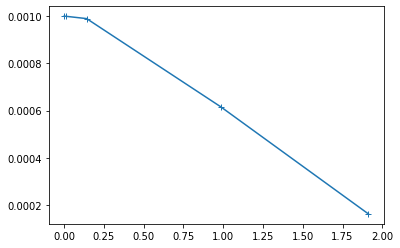

In [92]:
plt.plot(t3, sol3, marker='+')

In [34]:
t3

[0.0]

In [2]:
def lam(x, chiv, chis, dC_L, dC_R, ca_LR) :
    la = 0.5*ca_LR * (np.exp(-x/chiv) - np.exp(-0.5/chiv))
    l_L = (dC_L-ca_LR) * I_1_minus_v2(x, chiv, chis) / (2.*chiv*np.sinh(1./chis))
    l_R = (dC_R-ca_LR) * I_2_minus_v2(x, chiv, chis) / (2.*chiv*np.sinh(1./chis))
    return la + l_L - l_R

def mu(x, chiv, chis, dC_L, dC_R, ca_LR) :
    ma = 0.5*ca_LR * (np.exp(x/chiv) - np.exp(-0.5/chiv))
    m_L = (dC_L-ca_LR) * I_1_plus_v2(x, chiv, chis) / (2.*chiv*np.sinh(1./chis))
    m_R = (dC_R-ca_LR) * I_2_plus_v2(x, chiv, chis) / (2.*chiv*np.sinh(1./chis))
    return ma - m_L + m_R
    
def I_1_minus_v2(x, Xv, Xs) :
    c1, s1 = np.cosh(1./Xs), np.sinh(1./Xs)
    cmx, smx = np.cosh((x-0.5)/Xs), np.sinh((x-0.5)/Xs)
    
    if Xv == Xs :
        return 0.5*( (x-0.5)*np.exp(-0.5/Xv) + 0.5*Xv*(np.exp(-2.*x/Xv) - np.exp(-1./Xv))*np.exp(0.5/Xv) )
    
    return Xv*Xs*(np.exp(-x/Xv)*(Xv*cmx + Xs*smx) - Xv*np.exp(-0.5/Xv))/ ( (Xv-Xs)*(Xv+Xs) )

def I_2_minus_v2(x, Xv, Xs) :
    c1, s1 = np.cosh(1./Xs), np.sinh(1./Xs)
    cpx, spx = np.cosh((x+0.5)/Xs), np.sinh((x+0.5)/Xs)
    
    if Xv == Xs :
        return 0.5*( (x-0.5)*np.exp(0.5/Xv) + 0.5*Xv*(np.exp(-2.*x/Xv) - np.exp(-1./Xv))*np.exp(-0.5/Xv) )
    
    return Xv*Xs*(np.exp(-x/Xv)*(Xv*cpx + Xs*spx) - np.exp(-0.5/Xv)*(Xv*c1 + Xs*s1))/ ( (Xv-Xs)*(Xv+Xs) )

def I_1_plus_v2(x, Xv, Xs) :
    c1, s1 = np.cosh(1./Xs), np.sinh(1./Xs)
    cmx, smx = np.cosh((x-0.5)/Xs), np.sinh((x-0.5)/Xs)
    
    if Xv == Xs :
        return 0.5*( 0.5*Xv*(np.exp(2.*x/Xv) - np.exp(-1./Xv))*np.exp(-0.5/Xv) - (x+0.5)*np.exp(0.5/Xv))
    
    return Xv*Xs*(np.exp(x/Xv)*(Xv*cmx - Xs*smx) - np.exp(-0.5/Xv)*(Xv*c1 + Xs*s1))/ ( (Xv-Xs)*(Xv+Xs) )

def I_2_plus_v2(x, Xv, Xs) :
    c1, s1 = np.cosh(1./Xs), np.sinh(1./Xs)
    cpx, spx = np.cosh((x+0.5)/Xs), np.sinh((x+0.5)/Xs)
    
    if Xv == Xs :
        return 0.5*( 0.5*Xv*(np.exp(2.*x/Xv) - np.exp(-1./Xv))*np.exp(0.5/Xv) - (x+0.5)*np.exp(-0.5/Xv))
    
    return Xv*Xs*(np.exp(x/Xv)*(Xv*cpx - Xs*spx) - np.exp(-0.5/Xv)*Xv)/ ( (Xv-Xs)*(Xv+Xs) )


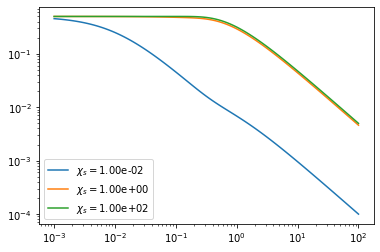

In [28]:
chiv_list = np.logspace(-3, 2, 101)
chis_list = [1e-2, 1., 100.]


for j in range(len(chis_list)) :
    Lam = np.zeros(len(chiv_list))
    for i in range(len(chiv_list)) :
        Lam[i] = lam(x=-0.5, chiv=chiv_list[i], chis=chis_list[j], dC_L=1., dC_R=1., ca_LR=0.)*np.exp(-0.5/chiv_list[i])
    plt.plot(chiv_list, Lam, label = r'$\chi_s = $'+"{:.2e}".format(chis_list[j]) )
    
plt.xscale('log')
plt.yscale('log')
plt.legend()


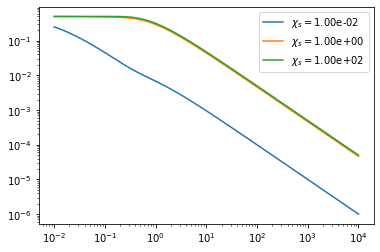

In [26]:
chiv_list = np.logspace(-2, 4, 101)
chis_list = [1e-2, 1., 100.]


for j in range(len(chis_list)) :
    Mu = np.zeros(len(chiv_list))
    for i in range(len(chiv_list)) :
        Mu[i] = mu(x=0.5, chiv=chiv_list[i], chis=chis_list[j], dC_L=1., dC_R=1., ca_LR=0.)*np.exp(-0.5/chiv_list[i])
    plt.plot(chiv_list, Mu, label = r'$\chi_s = $'+"{:.2e}".format(chis_list[j]) )
    
plt.xscale('log')
plt.yscale('log')
plt.legend()



In [42]:
np.seterr(all='warn')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

RuntimeWarning: divide by zero encountered in true_divide

In [46]:
import warnings
warnings.filterwarnings('error')
try : 
    warnings.warn(RuntimeWarning())
except Warning :
    print('RuntimeWarning is now an exception.')

W


In [49]:
try :
    np.array([1])/0.
except RuntimeWarning :
    print('Division by zero not allowed')

Division by zero not allowed
